<a href="https://colab.research.google.com/github/milioe/Moravec/blob/main/Fahrenheit_Celsius_(UAT).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Universal Approximation Theorem 

In [ ]:
!wget https://raw.githubusercontent.com/milioe/Moravec/master/TFDatasets/fahrenheit.csv

--2022-05-04 02:38:45--  https://raw.githubusercontent.com/milioe/Moravec/master/TFDatasets/fahrenheit.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 866 [text/plain]
Saving to: ‘fahrenheit.csv’

fahrenheit.csv      100%[===================>]     866  --.-KB/s    in 0s      

2022-05-04 02:38:46 (29.6 MB/s) - ‘fahrenheit.csv’ saved [866/866]



$(X - 32) \times 0.5556 = y$

In [ ]:
def fahr_to_cels(value):
  values = []
  for i in value:
    converter = (i-32)*0.5556
    values.append(converter)
  return values

In [ ]:
fahr_to_cels([-40])

[-40.0032]

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("fahrenheit.csv")

In [ ]:
df.head(50)

,F,C
0,-40,-40.0032
1,-38,-38.8920
2,-36,-37.7808
3,-34,-36.6696
4,-32,-35.5584
5,-30,-34.4472
6,-28,-33.3360
7,-26,-32.2248
8,-24,-31.1136
9,-22,-30.0024


In [ ]:
X_train = df.iloc[:50,0]
X_test = df.iloc[50:,0]

In [ ]:
y_train = df.iloc[:50,1]
y_test = df.iloc[50:,1]

In [ ]:
# 0. Declare random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1])
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the data 
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
2/2 [==============================] - 1s 10ms/step - loss: 17.6609 - mae: 17.6609
Epoch 2/10
2/2 [==============================] - 0s 11ms/step - loss: 16.4393 - mae: 16.4393
Epoch 3/10
2/2 [==============================] - 0s 10ms/step - loss: 15.0810 - mae: 15.0810
Epoch 4/10
2/2 [==============================] - 0s 15ms/step - loss: 14.8184 - mae: 14.8184
Epoch 5/10
2/2 [==============================] - 0s 16ms/step - loss: 15.7061 - mae: 15.7061
Epoch 6/10
2/2 [==============================] - 0s 13ms/step - loss: 14.9552 - mae: 14.9552
Epoch 7/10
2/2 [==============================] - 0s 9ms/step - loss: 14.8206 - mae: 14.8206
Epoch 8/10
2/2 [==============================] - 0s 10ms/step - loss: 14.7963 - mae: 14.7963
Epoch 9/10
2/2 [==============================] - 0s 9ms/step - loss: 15.1264 - mae: 15.1264
Epoch 10/10
2/2 [==============================] - 0s 9ms/step - loss: 14.8098 - mae: 14.8098


In [ ]:
y_preds = model.predict(X_test)

In [ ]:
y_preds

array([[ 9.657693 ],
       [ 9.985452 ],
       [10.3132105],
       [10.640969 ],
       [10.968728 ],
       [11.296487 ],
       [11.624246 ],
       [11.952004 ],
       [12.279763 ],
       [12.607522 ],
       [12.935281 ],
       [13.26304  ],
       [13.590798 ],
       [13.918557 ],
       [14.246316 ],
       [14.574075 ],
       [14.901834 ],
       [15.229592 ],
       [15.55735  ],
       [15.885109 ],
       [16.212868 ]], dtype=float32)

In [ ]:
fahr_to_cels(X_test)

[15.556799999999999,
 16.668,
 17.7792,
 18.8904,
 20.0016,
 21.1128,
 22.224,
 23.3352,
 24.4464,
 25.5576,
 26.668799999999997,
 27.779999999999998,
 28.891199999999998,
 30.002399999999998,
 31.113599999999998,
 32.2248,
 33.336,
 34.4472,
 35.5584,
 36.669599999999996,
 37.7808]

In [ ]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

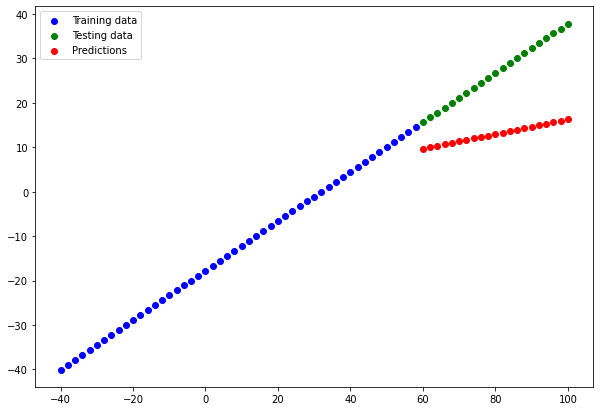

In [ ]:
plot_predictions(X_train,
                 y_train,
                 X_test,
                 y_test,
                 y_preds)

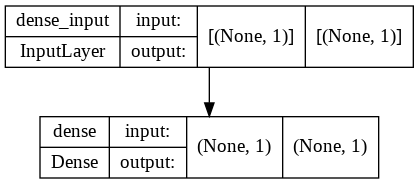

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 138ms/step - loss: 13.7335 - mae: 13.7335


[13.7335205078125, 13.7335205078125]

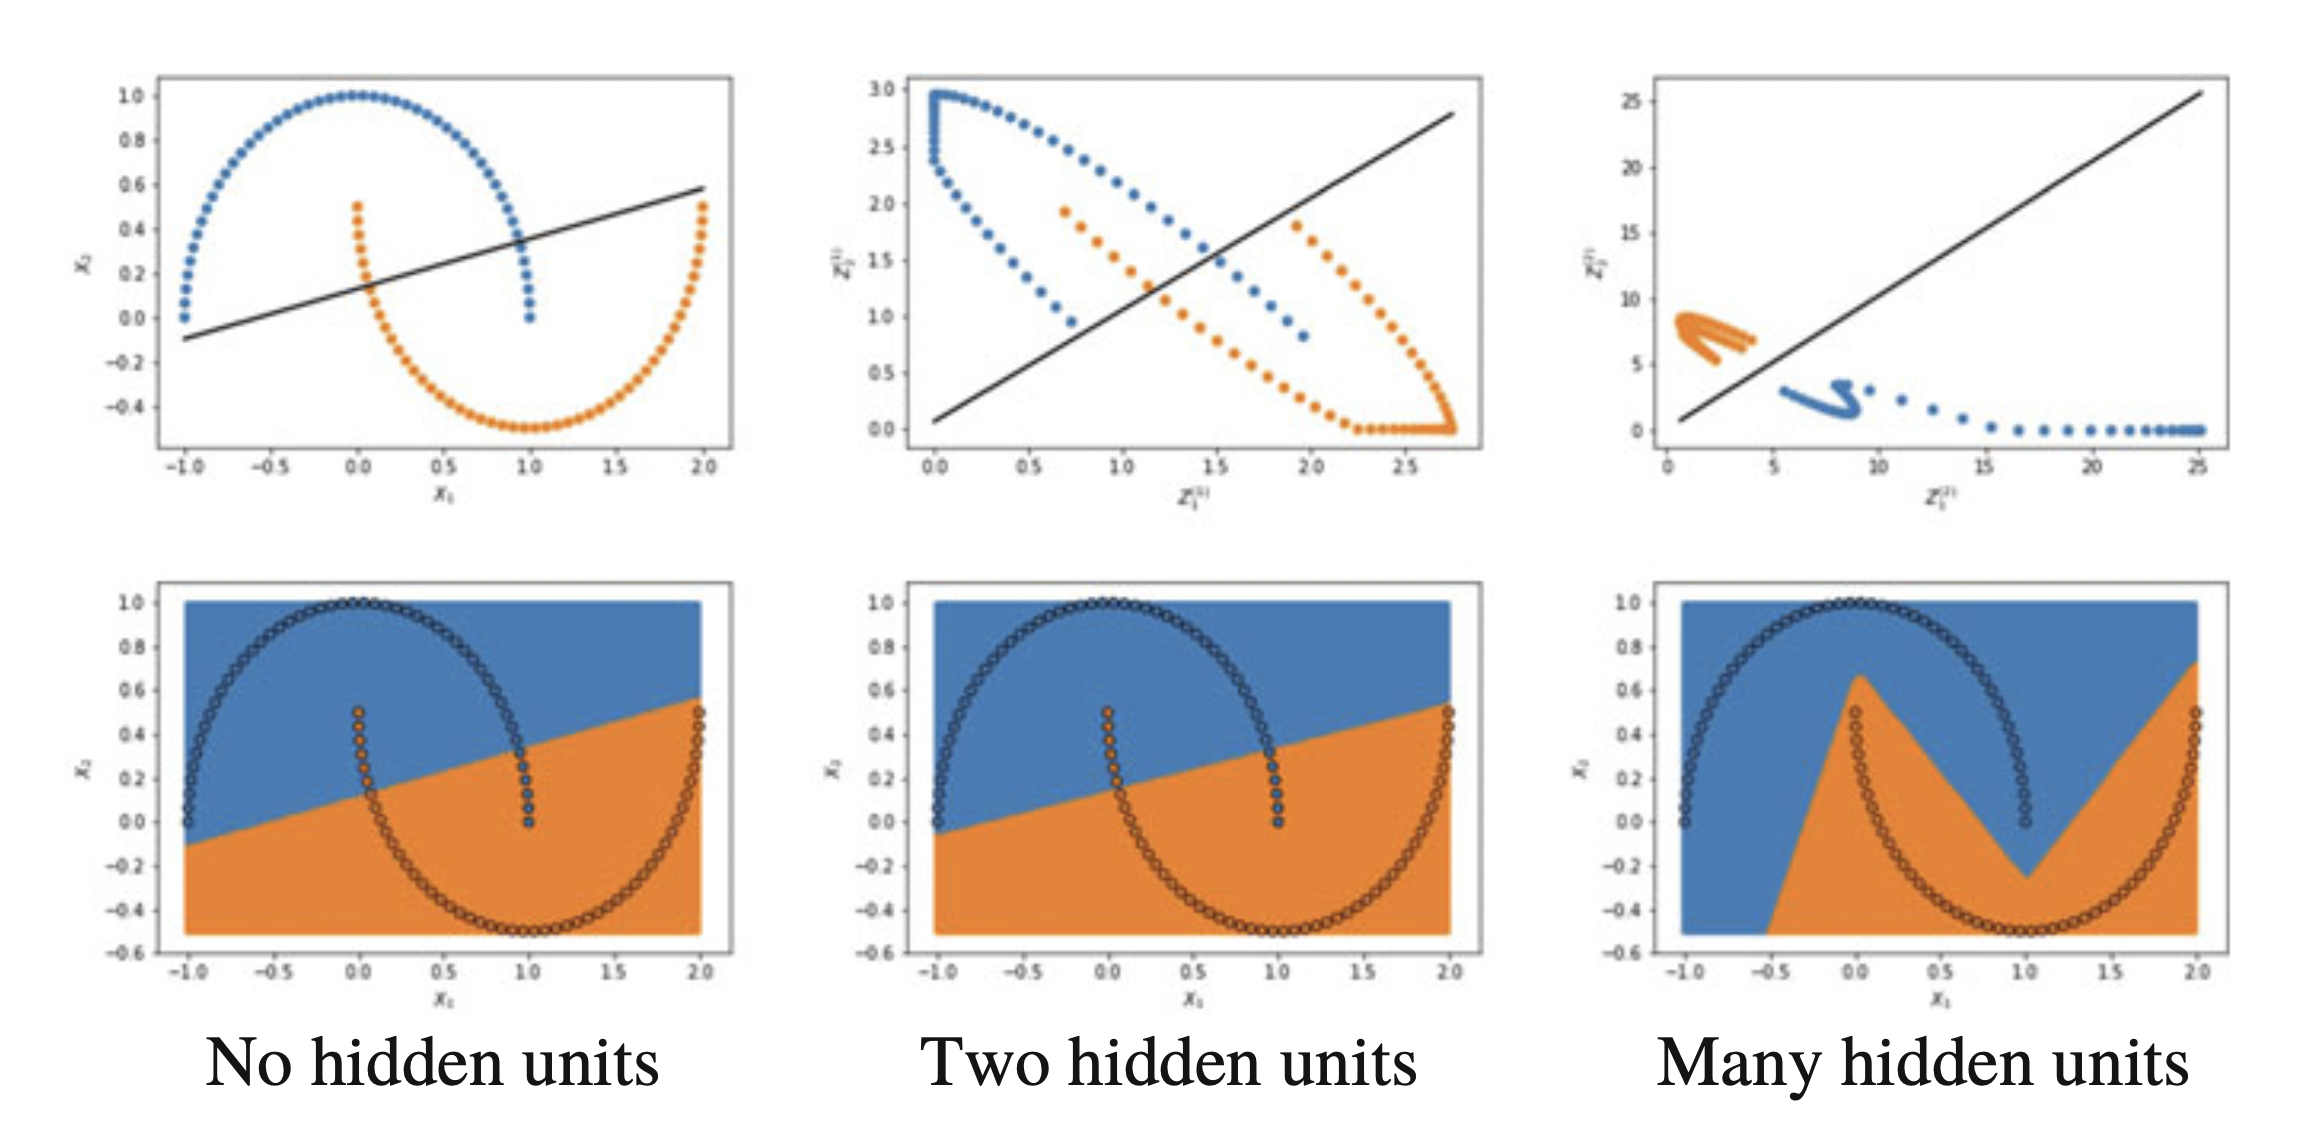

Taken from *Machine Learning with Finance, from theory to practice*

## Modelo 2

In [ ]:
# 0. Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation="relu"),
  tf.keras.layers.Dense(55),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["mae"])

# 3. Fit the model
model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
y_preds_2 = model_2.predict(X_test)

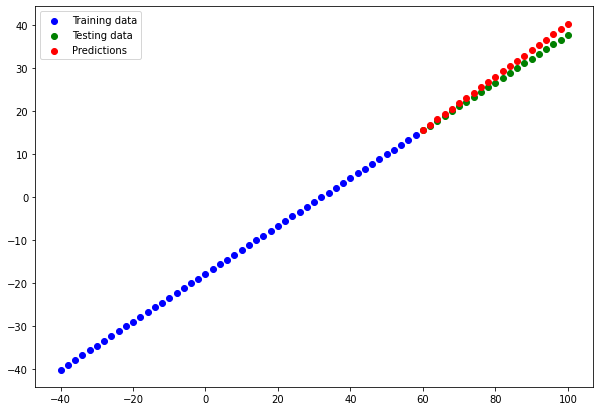

In [ ]:
plot_predictions(X_train,
                 y_train,
                 X_test,
                 y_test,
                 y_preds_2)

In [ ]:
model_2.predict([10])

array([[-15.27872]], dtype=float32)

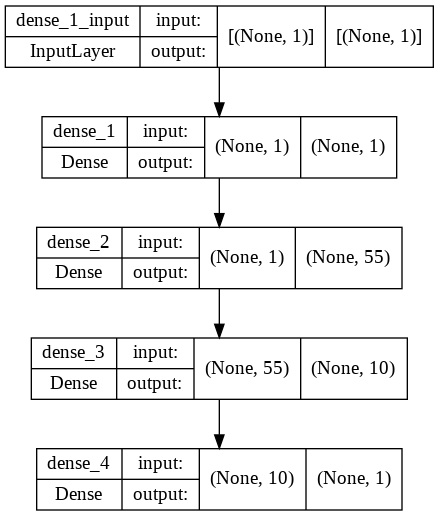

In [ ]:
plot_model(model_2, show_shapes=True)

In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
 dense_2 (Dense)             (None, 55)                110       
                                                                 
 dense_3 (Dense)             (None, 10)                560       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 683
Trainable params: 683
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.evaluate(X_test,y_test)

1/1 [==============================] - 0s 113ms/step - loss: 1.3432 - mae: 1.3432


[1.343210220336914, 1.343210220336914]

In [ ]:
# Obtain weights form first layer
print(model_2.layers[0].weights)

[<tf.Variable 'dense_1/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.35781935]], dtype=float32)>, <tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([0.78472847], dtype=float32)>]


In [ ]:
# Obtain weights form first layer
print(model_2.layers[0].bias.numpy())

[0.78472847]


In [ ]:
# Obtain weights form first layer
print(model_2.layers[0].bias_initializer)